# Paramterized Quantum Circuit(PQC)

In PQC the circuit consist of gates whose parameters can be updated freely. Some of such gates are $\{R_x,R_y,R_z,CR_Z,CR_x\}$. They are particularly useful because PQC offers a way to implement an algorithms in near-term quantum devices.

In [37]:
import pennylane as qml
from pennylane import numpy as np 
from matplotlib import pyplot as plt

[6.123234e-17-1.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]


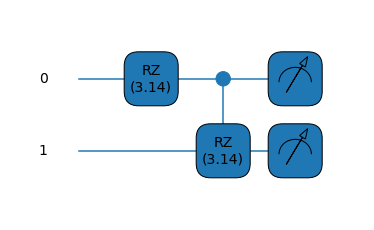

In [38]:
dev = qml.device('default.qubit',wires = 2)

@qml.qnode(dev)
def circuit(theta):
    qml.RZ(theta, wires = 0)
    qml.CRZ(theta,wires = [0,1])
    return qml.state()
theta = np.pi
state = circuit(theta)
print(state)
fig,ax = qml.draw_mpl(circuit,decimals=2)(theta)
plt.show()


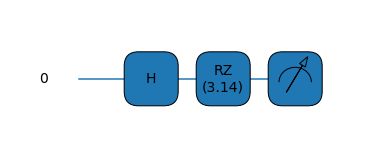

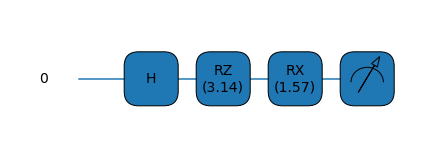

In [39]:
dev = qml.device('default.qubit',wires = 1)

@qml.qnode(dev)
def circuit1(theta):
    qml.Hadamard(wires = 0)
    qml.RZ(theta, wires = 0)
    return qml.expval(qml.PauliZ(0))

@qml.qnode(dev)
def circuit2(theta,phi):
    qml.Hadamard(wires = 0)
    qml.RZ(theta, wires = 0)
    qml.RX(phi, wires = 0)
    return qml.expval(qml.PauliZ(0))
phi = np.pi/2

fig,ax = qml.draw_mpl(circuit1,decimals=2)(theta)
fig,ax = qml.draw_mpl(circuit2,decimals=2)(theta,phi)
plt.show()


In [40]:
# Lets Visualize the Expressibility for the follow two circuits
from qiskit.circuit import QuantumCircuit,Parameter
import numpy as npr

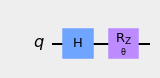

In [41]:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')
qc_1 = QuantumCircuit(1)
qc_1.h(0)
qc_1.rz(theta_param,0)

#second Circuit
qc_2 = QuantumCircuit(1)
qc_2.h(0)
qc_2.rz(theta_param,0)
qc_2.rx(phi_param,0)
qc_1.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

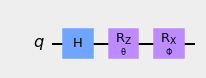

In [42]:

qc_2.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})



In [43]:
total_shots = 1000
npr.random.seed(42)
theta = [npr.pi * npr.random.uniform() for i in range(total_shots)]
phi =   [npr.pi *  npr.random.uniform() for i in range(total_shots)]

In [44]:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector


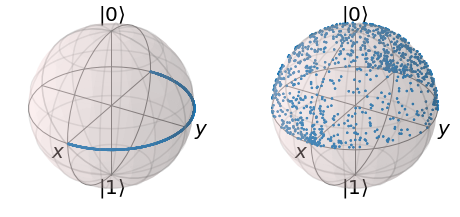

In [45]:
def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(total_shots):    
    state_1=Statevector.from_instruction(qc_1.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_2.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

In [46]:
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import NLocal


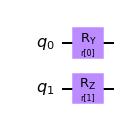

In [51]:
# Rotational Parameterized gates

pqc = QuantumCircuit(2)
parms = ParameterVector('r',2)
pqc.ry(parms[0],0)
pqc.rz(parms[1],1)
pqc.draw(output = 'mpl')

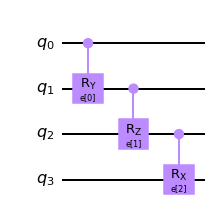

In [53]:
#Entangled State
ent_state = QuantumCircuit(4)
parms = ParameterVector('e',3)
ent_state.cry(parms[0],0,1)
ent_state.crz(parms[1],1,2)
ent_state.crx(parms[2],2,3)
ent_state.draw(output = "mpl")

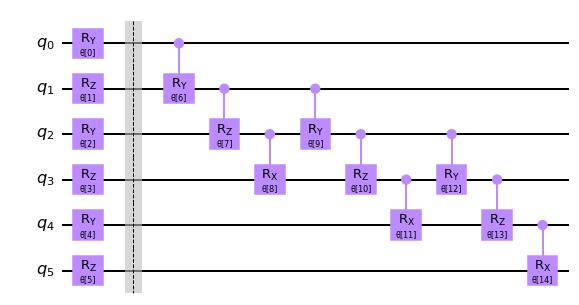

In [60]:
qc_nlocal = NLocal(num_qubits=6, rotation_blocks = pqc, entanglement_blocks=ent_state, entanglement='linear',
                    skip_final_rotation_layer=True, insert_barriers=True)
qc_nlocal.decompose().draw(output  = "mpl")
